<a href="https://colab.research.google.com/github/madhumitha-r26/DL_Learnings/blob/main/Realtime_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# from google.colab import drive
# drive.mount('/content/drive')

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [65]:
yolo=cv2.dnn.readNet("/content/drive/MyDrive/Colab Notebooks/DL/yolov3-tiny.weights","/content/drive/MyDrive/Colab Notebooks/DL/yolov3-tiny.cfg")

coco.names - contains pretrained classes (labels)

reading the class files

In [66]:
classes=[]

with open("/content/drive/MyDrive/Colab Notebooks/DL/coco.names","r") as f:
  classes=f.read().splitlines()

In [67]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [68]:
len(classes)

80

load image

In [69]:
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/DL/street_img.jpg")
blob=cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [70]:
blob.shape

(1, 3, 320, 320)

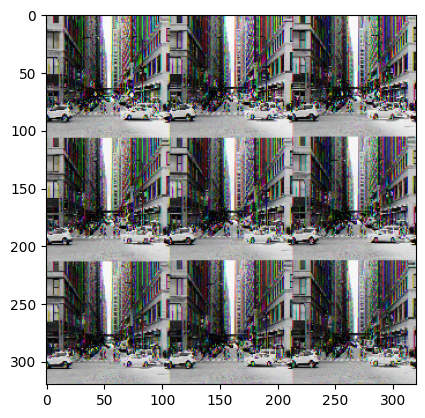

In [71]:
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [72]:
yolo.setInput(blob)

defining output layer

In [73]:
output_layers_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_name)

In [74]:
height, width, _ = img.shape

boxes=[]
confidences=[] # Renamed to confs to avoid conflict with individual confidence score
class_ids=[]

for output in layeroutput:
  for detection in output:
    score=detection[5:]   #1st 4 layers contains the parameters
    class_id=np.argmax(score)
    confidence=score[class_id] # Get the confidence of the detected class

    if confidence > 0.7:
      center_x=int(detection[0]*width)
      center_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)

      #center values
      x=int(center_x-w/2)
      y=int(center_y-h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence)) # Append the current confidence score
      class_ids.append(class_id)

In [75]:
len(boxes)

6

In [76]:
indices=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0,4)

In [77]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [78]:
if isinstance(indices, np.ndarray) and indices.size > 0: # Check if indices is a non-empty numpy array
  # The `colors` array is generated in a previous cell based on `len(boxes)`.
  # If `boxes` was empty, `colors` would be empty.
  # If `indices` is a non-empty NumPy array here, it implies `boxes` was populated,
  # so `colors` should also be populated and correctly sized.
  for i in indices.flatten():
    x,y,w,h=boxes[i]
    label=str(classes[class_ids[i]])
    confi=str(round(confidences[i],2))
    color=colors[i].tolist() # Corrected variable name and converted to list for cv2

    cv2.rectangle(img,(x,y),(x+w,y+h),color,2) # Changed 'i' to a fixed thickness, e.g., 2
    cv2.putText(img,label+" "+confi,(x,y+20),font,2,color,2) # Changed text color to 'color' and thickness to 2

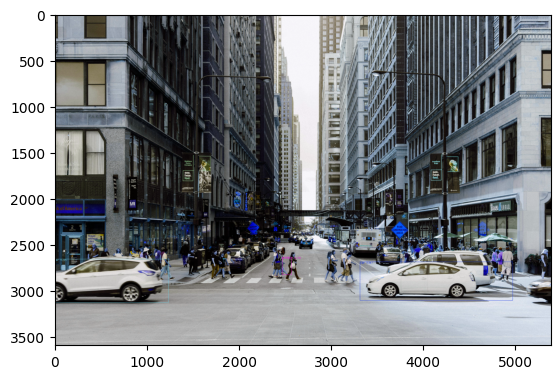

In [79]:
plt.imshow(img)

In [80]:
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/DL/street.jpg",img)

True